<h1><b>Sentiment Anlysis on personal WhatsApp chat

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
chat =  pd.read_csv('/root/Documents/dataset/WhatsApp-Chat/WhatsApp Chat with Ritendra Sawale COEP.txt',names=['user','to',1,2,3,4])

In [3]:
chat.head()

,user,to,1,2,3,4
0,Messages to this chat and calls are now secur...,to,end encryption. Tap for more info.,NaN,NaN,NaN
1,swapnil,🙏🏻🙏🏻,NaN,NaN,NaN,NaN
2,swapnil,Swapnil mane here,NaN,NaN,NaN,NaN
3,ritendra,Ho bhai✋,NaN,NaN,NaN,NaN
4,ritendra,Kai mag aj party ?,NaN,NaN,NaN,NaN


In [5]:
chat = chat.iloc[1:,:2]

In [6]:
chat.head()

,user,to
1,swapnil,🙏🏻🙏🏻
2,swapnil,Swapnil mane here
3,ritendra,Ho bhai✋
4,ritendra,Kai mag aj party ?
5,swapnil,Khup khush ashil


In [7]:
chat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 1 to 361
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    361 non-null    object
 1   to      354 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [8]:
#remove nan and empty row

blank = []
chat.dropna(inplace=True)

for i,msg in chat.to.iteritems():
    if type(msg) == str:
        if msg.isspace():
            blank.append(i)

In [9]:
blank

[]

In [10]:
chat['user'].value_counts()

 ritendra         213
 swapnil          140
 Block Ciphers      1
Name: user, dtype: int64

In [11]:
chat['user'][1]

' swapnil'

In [12]:
row  = []
for i,user in chat['user'].iteritems():
    if type(user) == str:
        if user == ' Block Ciphers':
            row.append(i)

In [13]:
row

[269]

In [14]:
chat.drop(row,inplace=True)

In [15]:
chat['user'].value_counts()

 ritendra    213
 swapnil     140
Name: user, dtype: int64

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
sid = SentimentIntensityAnalyzer()

In [18]:
a = 'movie is very good and very beutyfull'
sid.polarity_scores(chat['to'][356])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [19]:
chat['to'].apply(lambda x: sid.polarity_scores(x)['compound'])

1      0.0000
2      0.0000
3      0.0000
4      0.4019
5      0.0000
        ...  
357    0.0000
358    0.0000
359    0.0000
360    0.0000
361    0.0000
Name: to, Length: 353, dtype: float64

In [20]:
chat['compound_score']=chat['to'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [21]:
chat.head()

,user,to,compound_score
1,swapnil,🙏🏻🙏🏻,0.0000
2,swapnil,Swapnil mane here,0.0000
3,ritendra,Ho bhai✋,0.0000
4,ritendra,Kai mag aj party ?,0.4019
5,swapnil,Khup khush ashil,0.0000


In [22]:
chat['emotions']=chat['compound_score'].apply(lambda x: 'Positive' if x>0 else('Neutral' if x==0 else 'Negative'))

In [23]:
chat.head()

,user,to,compound_score,emotions
1,swapnil,🙏🏻🙏🏻,0.0000,Neutral
2,swapnil,Swapnil mane here,0.0000,Neutral
3,ritendra,Ho bhai✋,0.0000,Neutral
4,ritendra,Kai mag aj party ?,0.4019,Positive
5,swapnil,Khup khush ashil,0.0000,Neutral


<b>Overall emotions during the chat

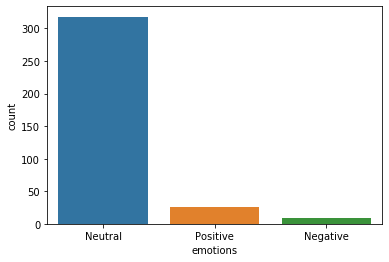

In [24]:
sns.countplot(chat['emotions'])

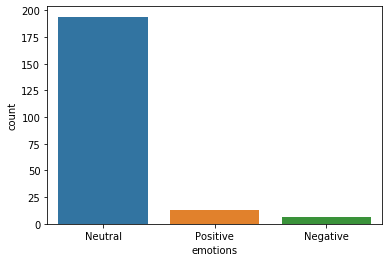

In [25]:
#Ritendra emotions during chat
sns.countplot(chat[chat['user']==' ritendra']['emotions'])

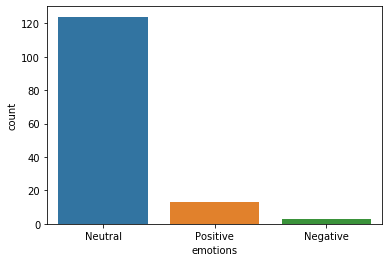

In [26]:
#Swapnil emotions during chat
sns.countplot(chat[chat['user']==' swapnil']['emotions'])

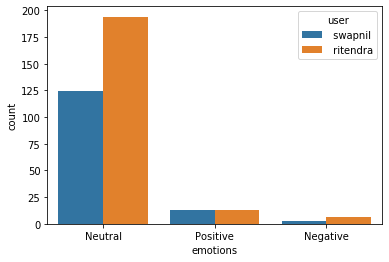

In [27]:
sns.countplot(chat['emotions'],hue=chat['user'])

In [28]:
#emoji conerting to text
from emot.emo_unicode import UNICODE_EMO

In [29]:
def emoToText(text):
    for em in UNICODE_EMO:
        text = text.replace(em,''.join(UNICODE_EMO[em]).replace("_"," ").replace(":",""))
    return text

txt="swap 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒"
emoToText(txt)

'swap face with tears of joy. The feeling of making a sale smiling face with sunglasses, The feeling of actually fulfilling orders unamused face'

In [30]:
chat['Updated_msg'] = chat['to'].apply(lambda x: emoToText(x))

In [31]:
chat['after_compound_score']=chat['Updated_msg'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [32]:
chat.head()

,user,to,compound_score,emotions,Updated_msg,after_compound_score
1,swapnil,🙏🏻🙏🏻,0.0000,Neutral,folded handslight skin tonefolded handslight ...,0.0000
2,swapnil,Swapnil mane here,0.0000,Neutral,Swapnil mane here,0.0000
3,ritendra,Ho bhai✋,0.0000,Neutral,Ho bhairaised hand,0.4939
4,ritendra,Kai mag aj party ?,0.4019,Positive,Kai mag aj party ?,0.4019
5,swapnil,Khup khush ashil,0.0000,Neutral,Khup khush ashil,0.0000


In [33]:
chat['after_emotions']=chat['compound_score'].apply(lambda x: 'Positive' if x>0 else('Neutral' if x==0 else 'Negative'))

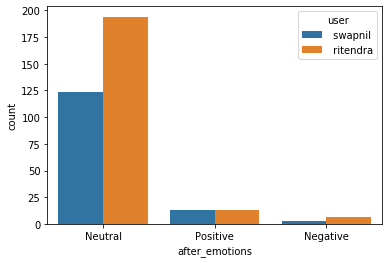

In [34]:
sns.countplot(chat['after_emotions'],hue=chat['user'])